# One hashtag (title 1)

## Two hashtags (title 2)
In this example I will show how to write a text in Jupyter

In [5]:
# Re-read the libraries in Jupyter
%reload_ext autoreload
%autoreload 2

## library
import numpy as np
import pandas as pd
import sys

rootdir = '/app/script/'
sys.path.append(rootdir)

from context import *



/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


### Read file from numpy file

In [6]:

### read file from numpy
df = np.load("../data/lidar.npy")
print(df)

[[8.10290844e+05 9.71324910e+06 1.05822000e+02]
 [8.10291665e+05 9.71324909e+06 1.14642000e+02]
 [8.10291418e+05 9.71324601e+06 1.13153000e+02]
 ...
 [8.10489448e+05 9.71343864e+06 7.70040000e+01]
 [8.10489548e+05 9.71344000e+06 7.81760000e+01]
 [8.10489545e+05 9.71344560e+06 7.16840000e+01]]


# Function point to raster

In [7]:
### function to create the image
def GridTab( data, size, stat ):
	"""[summary]

	Args:
		data (numpy): array with x y z of point lifar
		size (integer): mapv pixel size
		stat (string): stat type

	Returns:
		data frame: with x columns and y as rowns
	"""
	### definition of input data as data frame
	dfcxyz= pd.DataFrame(data, columns=['x', 'y', 'z'] )
	### Setting the x and y classes of pixel size
	dfcxyz['cx10'] = data[:,0]/size
	dfcxyz['cy10'] = data[:,1]/size
	dfcxyz['cx10']=dfcxyz['cx10'].astype(int)
	dfcxyz['cy10']=dfcxyz['cy10'].astype(int)
	dfcxyz['X']=dfcxyz['cx10']*size
	dfcxyz['Y']=dfcxyz['cy10']*size
	### pivot tables to create the images or models
	MD = pd.pivot_table(dfcxyz, index= 'Y', columns= 'X', values = 'z', aggfunc=stat)
	## inverting the order of y utm that is in the crescent order
	MDR=np.flipud(MD) 
	## returning the image in the form of pandas data
	return  MDR



# Apply the model

In [8]:

### applying the function and calculating the MDS
MDmax= GridTab( df, 1, 'max')
# point_to_raster
print(MDmax)

[[102.333 102.069 100.074 ...  83.427  83.43   82.179]
 [102.204 102.106  99.833 ...  82.967  82.88   82.248]
 [102.45  101.754  97.764 ...  83.399  83.077  82.555]
 ...
 [116.596 116.375 115.468 ... 100.902 100.486 100.035]
 [117.508 117.263 117.14  ...  99.557  99.325  97.569]
 [116.122 117.031 117.163 ... 100.078 100.377  99.695]]


# Plot of surface model

## this image contain nodata (noise)

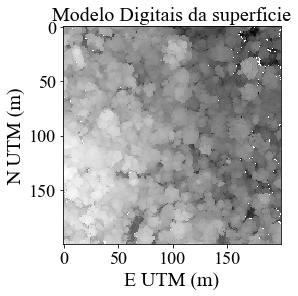

In [9]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.imshow(MDmax, cmap=plt.cm.gray, interpolation='nearest' )
plt.title('MDS')
plt.xlabel('E UTM (m)')
plt.ylabel('N UTM (m)')
plt.show()
f.savefig("../output/figure.png", dpi=300, facecolor='white', transparent=False)